# Intermediate Machine Learning: Assignment 2

**Deadline**

Assignment 2 is due Wednesday, October 9 11:59pm. Late work will not be accepted as per the course policies (see the Syllabus and Course policies on Canvas).

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

You should start early so that you have time to get help if you're stuck. The drop-in office hours schedule can be found on Canvas. You can also post questions or start discussions on Ed Discussion. The assignment may look long at first glance, but the problems are broken up into steps that should help you to make steady progress.

**Submission**

Submit your assignment as a pdf file on Gradescope, and as a notebook (.ipynb) on Canvas. You can access Gradescope through Canvas on the left-side of the class home page. The problems in each homework assignment are numbered. Note: When submitting on Gradescope, please select the correct pages of your pdf that correspond to each problem. This will allow graders to more easily find your complete solution to each problem.

To produce the .pdf, please do the following in order to preserve the cell structure of the notebook:

Go to "File" at the top-left of your Jupyter Notebook
Under "Download as", select "HTML (.html)"
After the .html has downloaded, open it and then select "File" and "Print" (note you will not actually be printing)
From the print window, select the option to save as a .pdf

**Topics**

 * Convolutional neural networks
 * Gaussian processes
 * Double descent

This assignment will also help to solidify your Python and Jupyter notebook skills.


## Problem 1: It's not a bug, it's a feature! (20 points)

In this problem, we will ["open the black box"](https://news.yale.edu/2018/12/10/why-take-ydata-because-data-science-shouldnt-be-black-box) and inspect the filters and feature maps learned by a convolutional neural network trained to classify handwritten digits, using the MNIST database.

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### 1.1 Visualizing the filters

To begin, we load the dataset with 60000 training images and 10000 test images.

In [3]:
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train_binary = keras.utils.to_categorical(y_train, num_classes)
y_test_binary = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Next, we initialize our convolutional neural network.

In [4]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(5, 5), activation="relu", name='conv1'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(5, 5), activation="relu", name='conv2'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2 (Conv2D)              (None, 8, 8, 32)          25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0

In [5]:
batch_size = 128
epochs = 1

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train_binary, batch_size=batch_size, epochs=epochs, validation_split=0.1)

  8/422 [..............................] - ETA: 3s - loss: 2.2230 - accuracy: 0.1855 

2024-10-08 11:00:44.730038: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


422/422 [==============================] - 3s 7ms/step - loss: 0.4333 - accuracy: 0.8637 - val_loss: 0.0842 - val_accuracy: 0.9772


In [6]:
score = model.evaluate(x_test, y_test_binary, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.09436820447444916
Test accuracy: 0.9724000096321106


Now that we've trained and tested the model, let's look at the filters learned in the first convolutional layer.

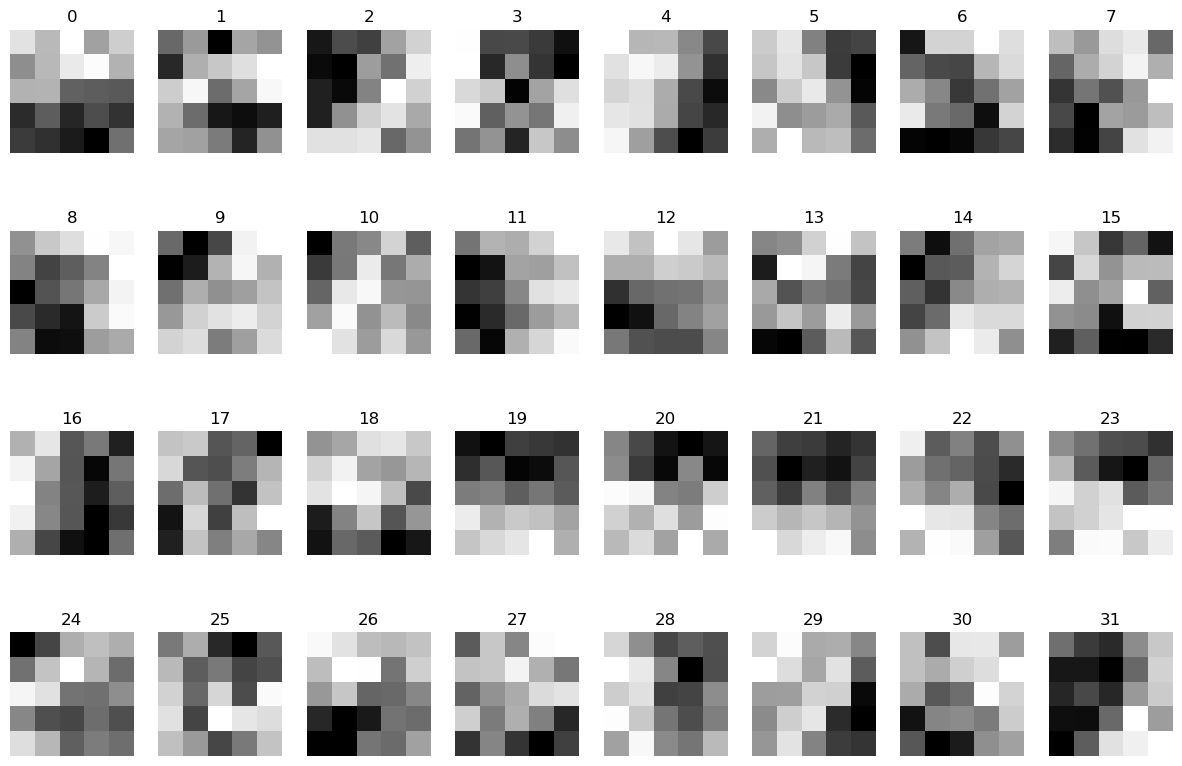

In [7]:
filters_conv1 = model.get_layer(name='conv1').get_weights()[0]

fig, axs = plt.subplots(4, 8)
fig.set_figheight(10)
fig.set_figwidth(15)

for i in range(4):
    for j in range(8):
        f = filters_conv1[:, :, 0, 8*i+j]
        axs[i, j].imshow(f[:, :], cmap='gray')
        axs[i, j].axis('off')
        axs[i, j].set_title(8*i+j)

Describe what you see. Do (some of) the learned filters make sense to you?

Hint: Many filters have been designed and widely applied in image processing. [Here](http://www.theobjects.com/dragonfly/dfhelp/3-5/Content/05_Image%20Processing/Edge%20Detection%20Filters.htm) are some examples of edge detection filters and their effect on the image. You can find the details about each filter by clicking the links at the bottom.

<font color='darkorchid'>Answer:</font> Most learned filters make sense while others are not as clear. Some filters capture basic horizontal, vertical, or diagonal edges, which can distinguish numbers. Others represent gradients, where there is a gradual change in intensity from black to white or vice versa. These can help in detecting regions of transition or curves, important for recognizing digits like "3" or "8" that have curved strokes. A few filters seem to capture more complex patterns, such as curved shapes or areas of light/dark contrast that could help in detecting specific parts of a digit, such as loops or intersections (like those found in digits "0", "6", or "9").
The last set of filters are rather abstract or don't seem to represent any obvious interpretable features. These might still be useful to the network in combination with other filters but are less intuitively meaningful when viewed in isolation.


### 1.2 Visualizing the feature maps

We can also look at the corresponding feature map for each filter. There are 32 kernels at the first convolutional layer, so there are 32 feature maps for each sample. feature_map_conv1 is a 4D matrix where the first dimension is the index of the sample and the last dimension is the index of the correpsonding filter.

In [8]:
conv1_layer_model = keras.Model(inputs=model.input, outputs=model.get_layer('conv1').output)
feature_map_conv1 = conv1_layer_model(x_test)

Randomly draw 16 samples for visualization.

In [9]:
sample_index = random.sample(range(1, len(x_test)), 16)

Choose two filters among all 32 filters from 2.1, and visualize their feature maps.

In [19]:
filter_n1 = 0
filter_n2 = 31

There is no need to modify the next code cells, just run the four cells below.

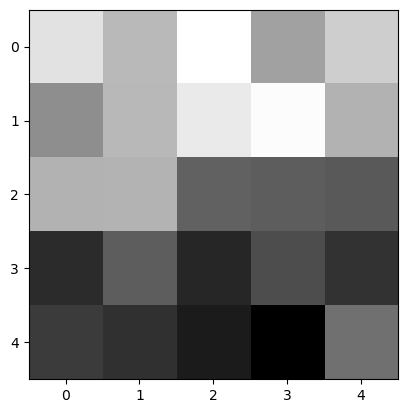

In [13]:
plt.imshow(filters_conv1[:, :, 0, filter_n1], cmap='gray')

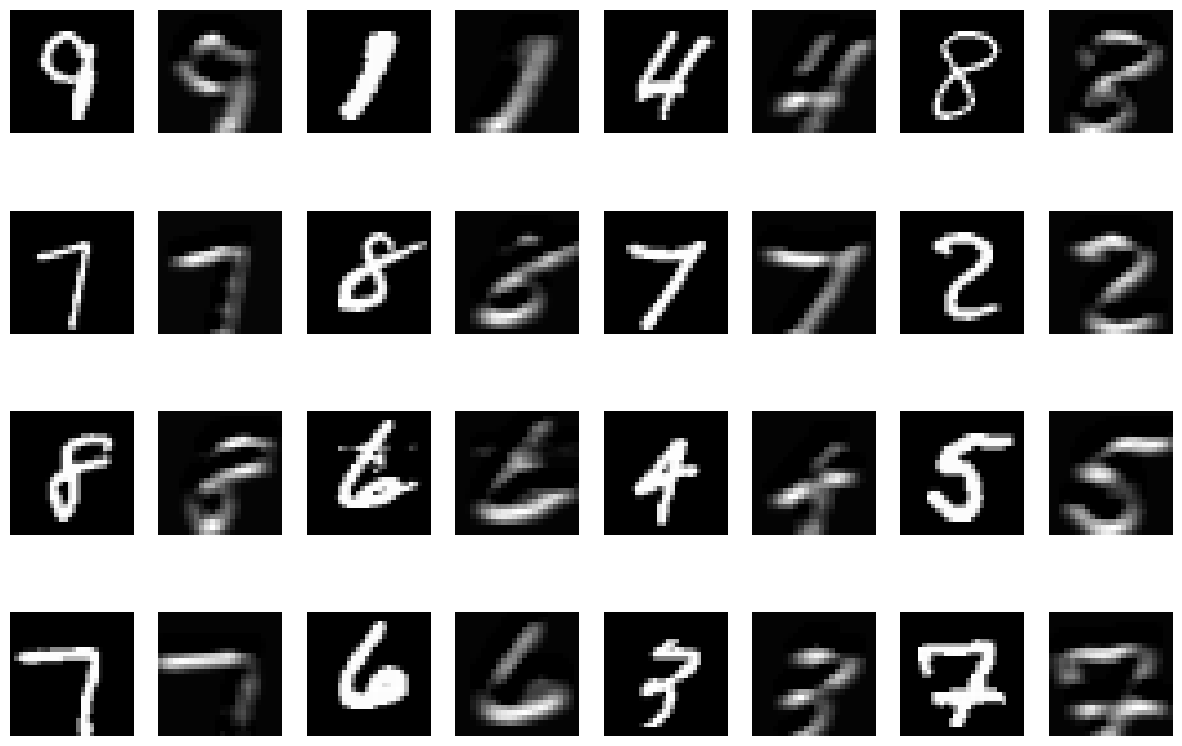

In [14]:
fig, axs = plt.subplots(4, 8)
fig.set_figheight(10)
fig.set_figwidth(15)

ix=0
for i in range(4):
    for j in range(4):
        axs[i, 2*j].imshow(x_test[sample_index[4*i+j], :, :, 0], cmap='gray')
        axs[i, 2*j].axis('off')
        axs[i, 2*j+1].imshow(feature_map_conv1[sample_index[4*i+j], :, :, filter_n1], cmap='gray')
        axs[i, 2*j+1].axis('off')

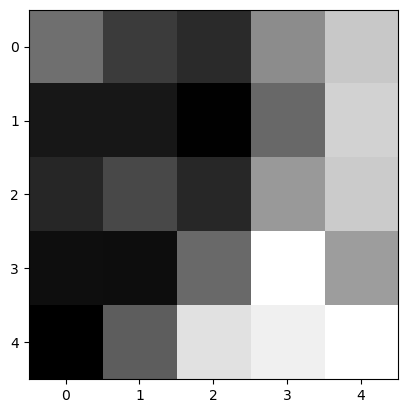

In [20]:
plt.imshow(filters_conv1[:, :, 0, filter_n2], cmap='gray')

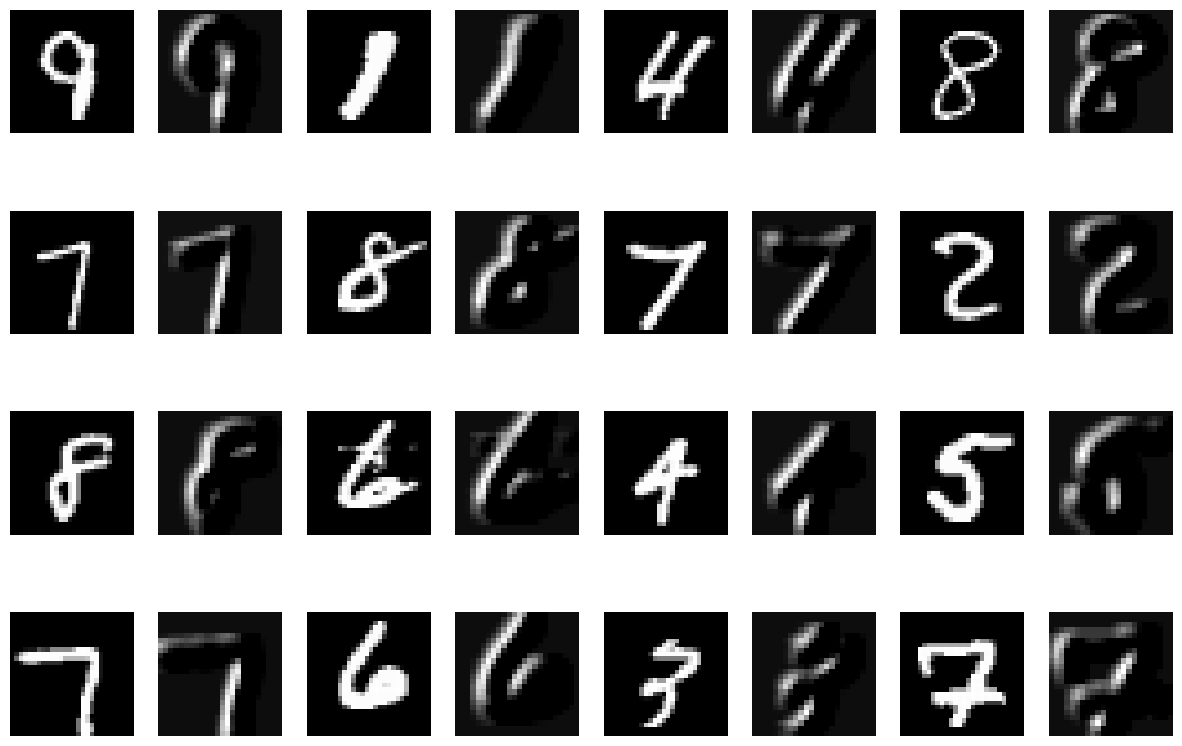

In [21]:
fig, axs = plt.subplots(4, 8)
fig.set_figheight(10)
fig.set_figwidth(15)

ix=0
for i in range(4):
    for j in range(4):
        axs[i, 2*j].imshow(x_test[sample_index[4*i+j], :, :, 0], cmap='gray')
        axs[i, 2*j].axis('off')
        axs[i, 2*j+1].imshow(feature_map_conv1[sample_index[4*i+j], :, :, filter_n2], cmap='gray')
        axs[i, 2*j+1].axis('off')

Comment on what you see in the feature maps.
* How do they correspond to the original images?
* How do they correspond to the filters?
* Why might the feature maps be helpful for classifying digits?

<font color='darkorchid'>Answer:</font> The feature maps highlight specific parts of the original image which are masked or lit after passing through the filters. For filter 1, which is a horizontal edge detector, the horizontal edges are more apparent in the feature maps (ie., the middle line in the 4, the top and bottom lines of the 2, and 3, the top line on the 7, etc.). For filter 2, which is a diagonal edge detector, the diagonal lines of the 4, 6, and 7, are especially apparent, while other aspects of the pictures are masked. These feature maps are helpful for classifying digits because they capture the differences in the shapes of the digits and identify distinctive characteristics by which the model can separate digits.

### 1.3 Fitting a logistic regression model on feature maps

The features of the images are further summarized after the second convolutional layer.

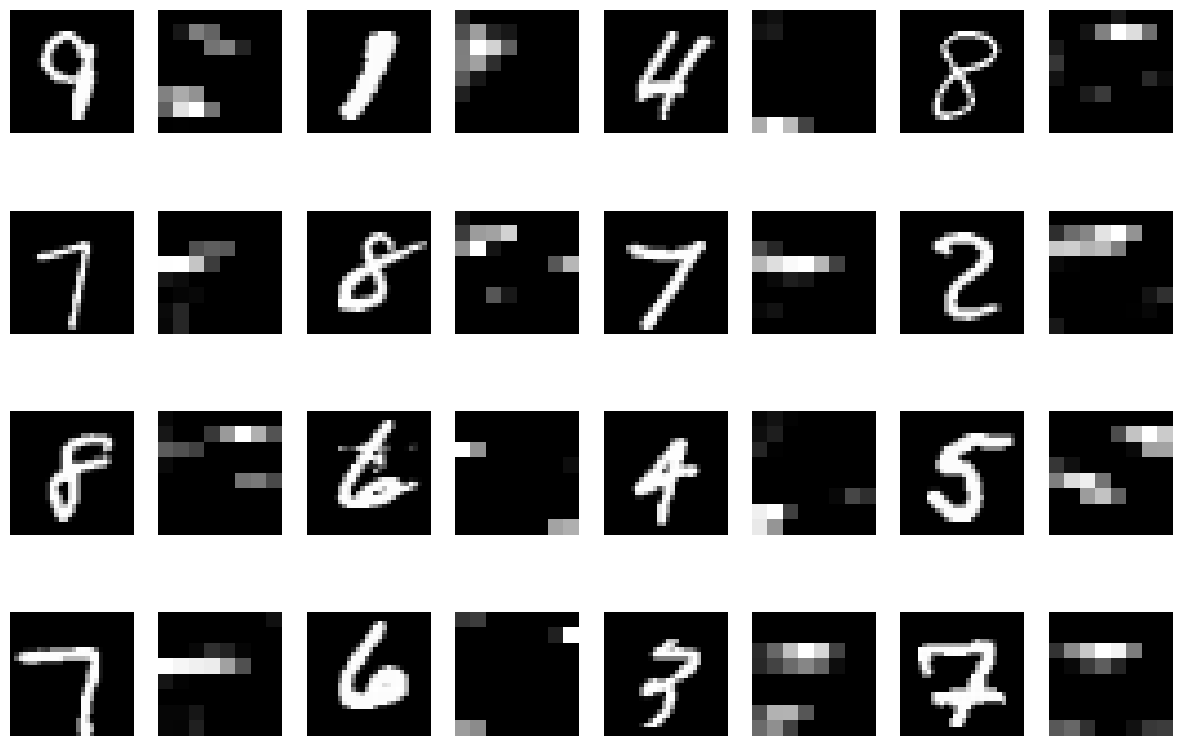

In [23]:
conv2_layer_model = keras.Model(inputs=model.input, outputs=model.get_layer('conv2').output)
feature_map_conv2 = conv2_layer_model(x_test)

fig, axs = plt.subplots(4, 8)
fig.set_figheight(10)
fig.set_figwidth(15)

ix=0
for i in range(4):
    for j in range(4):
        axs[i, 2*j].imshow(x_test[sample_index[4*i+j], :, :, 0], cmap='gray')
        axs[i, 2*j].axis('off')
        axs[i, 2*j+1].imshow(feature_map_conv2[sample_index[4*i+j], :, :, 0], cmap='gray')
        axs[i, 2*j+1].axis('off')

Build and test a logistic regression model to classify two digits of your choice (i.e. a binary classification) using the features maps at the second convolutional layer as the input. You may use logistic regression functions such as [LogisticRegression in sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Use 80% of the data for training and 20% for test.

* How many features are there in your input X? Show the derivation of this number based on the architecture of the convolutional neural network.

* How is your logistic regression model related to the fully connected layer and softmax layer in the convolutional neural network?

* What is the accuracy of your model? Is this expected, or surprising? 

* Comment on any other aspects of your findings that are interesting to you.


In [24]:
X_lr = np.reshape(feature_map_conv2,(np.shape(feature_map_conv2)[0],-1))
y_lr = y_test

In [31]:
# Your code here
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.9825
Confusion Matrix:
[[201   0   0   0   0   0   1   0   1   0]
 [  0 215   1   0   0   0   0   0   0   0]
 [  0   2 210   0   0   0   0   1   0   0]
 [  0   0   0 203   0   1   0   1   0   3]
 [  0   0   1   0 212   0   1   0   1   0]
 [  0   0   0   1   0 171   1   0   0   1]
 [  2   0   0   0   1   0 196   0   1   0]
 [  0   0   2   0   0   0   0 185   0   0]
 [  0   0   1   0   0   1   1   0 182   1]
 [  0   2   0   1   3   1   0   1   0 190]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       203
           1       0.98      1.00      0.99       216
           2       0.98      0.99      0.98       213
           3       0.99      0.98      0.98       208
           4       0.98      0.99      0.98       215
           5       0.98      0.98      0.98       174
           6       0.98      0.98      0.98       200
           7       0.98      0.99      0.99       187
           8       0.98 

<font color='darkorchid'>How many features are there in your input X? Show the derivation of this number based on the architecture of the convolutional neural network.</font>

After conv1: The input size is (28, 28, 1), and a filter size of (5, 5) with 32 filters is applied, resulting in an output of (24, 24, 32).

After max_pooling2d: A (2, 2) pooling reduces it to (12, 12, 32).

After conv2: Applying a (5, 5) filter results in (8, 8, 32) feature maps.

After max_pooling2d_1: Pooling reduces this to (4, 4, 32).

Now, flattening this feature map into a 1D array gives:
4 × 4 × 32 = 512 features

**Thus, the logistic regression model takes 512 features as input.**

<font color='darkorchid'>How is your logistic regression model related to the fully connected layer and softmax layer in the convolutional neural network?</font>

Both logistic regression and the fully connected layer serve as classifiers that predict the final output; both use a set of weights to map a high-dimensional input (flattened feature maps) to the desired output (classes). Logistic regression only handles binary classification, whereas a softmax layer handles multi-class classification.


<font color='darkorchid'>What is the accuracy of your model? Is this expected, or surprising?</font>

The model accuracy is 98%. This was surprisingly high to me and it means that the convolutional layers are effective at extracting meaningful features. I would have thought more layers would be necessary.

<font color='darkorchid'>Comment on any other aspects of your findings that are interesting to you.</font>

I think it's interesting that the CNN has a dropout layer after flattening, which helps prevent overfitting by randomly dropping units during training. However, since we are using logistic regression on pre-extracted features, this dropout layer does not directly impact your logistic regression model's performance.

## Problem 2: All that glitters (20 points)

In this problem you will use Gaussian process regression to model the trends in gold medal performances of selected events in the summer Olympics. The objectives of this problem are for you to:

* Gain experience with Gaussian processes, to better understand how they work
* Explore how posterior inference depends on the properties of the prior mean and kernel
* Use Bayesian inference to identify unusual events
* Practice making your Python code modular and reusable

For this problem, the only starter code we provide is to read in the data and extract 
one event. You may write any GP code that you choose to, but please do not use any 
package for Gaussian processes; your code should be "np-complete" (using only 
basic `numpy` methods). You are encouraged to start from the [GP demo code](https://ydata123.org/fa24/interml/calendar.html) used in class.


When we ran the GP demo code from class on the marathon data, it generated the following plot:
<img src="https://github.com/YData123/sds365-fa22/raw/main/assignments/assn2/marathon.jpg" width="600">

Note several properties of this plot:
* It shows the Bayesian confidence of the regression, as a shaded area. This is a 95% confidence band because it has width given by $\pm 2 \sqrt{V}$, where $V$ is the estimated variance. The variance increases at the right side, for future years.

* The gold medal time for the 1904 marathon is outside of this confidence band. In fact, the 1904 marathon was an [unusual event](https://www.smithsonianmag.com/history/the-1904-olympic-marathon-may-have-been-the-strangest-ever-14910747/), and this is apparent from the model. 

* The plot shows the posterior mean, and also shows one random sample from the posterior distribution.

Your task in this problem is generate such a plot for six different Olympic events by writing a function

`def gp_olympic_event(year, result, kernel, mean, noise, event_name):
    ...`
    
 where the input variables are the following:
 
* `year`: a numpy array of years (integers)
* `result`: a numpy array of numerical results, for the gold medal performances in that event
* `kernel`: a kernel function 
* `mean`: a mean function 
* `noise`: a single float for the variance of the noise, $\sigma^2$
* `event_name`: a string used to label the y-axis, for example "marathon min/mile (men's event)"
 
Your function should compute the Gaussian process regression, and then display the resulting plot, analogous to the plot above for the men's marathon event.

You will then process **six** of the events, three men's events and three women's events, and call your function to generate the corresponding six plots.

For each event, you should create a markdown cell that describes the resulting model. Comment on such things as:

* How you chose the kernel, mean, and noise.
* Why the plot does or doesn't look satisfactory to you
* If there are any events such as the 1904 marathon that are notable.
* What happens to the posterior mean (for example during WWII) if there are gaps in the data

Use your best judgement to describe your findings; post questions to EdD if things are unclear. And have fun!



------------------

In the remainder of this problem description, we recall how we processed the marathon data, as an example. The following cell reads in the data and displays the collection of events that are included in the dataset. 

In [93]:
import numpy as np
import pandas as pd

dat = pd.read_csv('https://raw.githubusercontent.com/YData123/sds365-sp22/main/demos/gaussian_processes/olympic_results.csv')
events = set(np.array(dat['Event']))
print(events)

{'Marathon Men', 'Marathon Women', '200M Men', '20Km Race Walk Women', 'Discus Throw Men', 'Javelin Throw Women', 'Triple Jump Women', '4X100M Relay Women', '10000M Men', 'Shot Put Women', '4X100M Relay Men', 'Shot Put Men', '20Km Race Walk Men', '400M Women', 'Hammer Throw Women', '200M Women', '400M Men', '400M Hurdles Women', 'High Jump Men', 'Pole Vault Women', '100M Hurdles Women', '4X400M Relay Men', 'Decathlon Men', '50Km Race Walk Men', 'Long Jump Men', '100M Women', '5000M Women', 'Discus Throw Women', 'Javelin Throw Men', 'Heptathlon Women', '3000M Steeplechase Women', '10000M Women', '3000M Steeplechase Men', '800M Men', '5000M Men', 'Pole Vault Men', '100M Men', 'Hammer Throw Men', 'High Jump Women', '4X400M Relay Women', '800M Women', '1500M Men', 'Triple Jump Men', '110M Hurdles Men', 'Long Jump Women', '1500M Women', '400M Hurdles Men'}


We then process the time to compute the minutes per mile (without checking that the race was actually 26.2 miles!)

In [83]:
marathon = dat[dat['Event'] == 'Marathon Men']
marathon = marathon[marathon['Medal']=='G']
marathon = marathon.sort_values('Year')
time = np.array(marathon['Result'])
mpm = []
for tm in time:
    t = np.array(tm.split(':'), dtype=float)
    minutes_per_mile = (t[0]*60*60 + t[1]*60 + t[2])/(60*26.2)
    mpm.append(minutes_per_mile)
    
marathon['Minutes per Mile'] = np.round(mpm,2)
marathon = marathon.drop(columns=['Gender', 'Event'], axis=1)
marathon.reset_index(drop=True, inplace=True)
year = np.array(marathon['Year'])
result = np.array(marathon['Minutes per Mile'])
marathon

[1896 1900 1904 1908 1912 1920 1924 1928 1932 1936 1948 1952 1956 1960
 1964 1968 1972 1976 1980 1984 1988 1992 1996 2000 2004 2008 2012 2016]


,Location,Year,Medal,Name,Nationality,Result,Minutes per Mile
0,Athens,1896,G,Spyridon LOUIS,GRE,2:58:50,6.83
1,Paris,1900,G,Michel THÃATO,FRA,2:59:45.0,6.86
2,St Louis,1904,G,Thomas HICKS,USA,3:28:53.0,7.97
3,London,1908,G,John HAYES,USA,2:55:18.4,6.69
4,Stockholm,1912,G,Kennedy Kane MCARTHUR,RSA,2:36:54.8,5.99
5,Antwerp,1920,G,Hannes KOLEHMAINEN,FIN,2:32:35.8,5.82
6,Paris,1924,G,Albin STENROOS,FIN,2:41:22.6,6.16
7,Amsterdam,1928,G,BoughÃ¨ra EL OUAFI,FRA,2:32:57,5.84
8,Los Angeles,1932,G,Juan Carlos ZABALA,ARG,2:31:36,5.79
9,Berlin,1936,G,Kitei SON,JPN,2:29:19.2,5.70


Enter your code and markdown following this cell.

Processing event: Marathon Men
7: Years extracted: [1896 1900 1904 1908 1912 1920 1924 1928 1932 1936 1948 1952 1956 1960
 1964 1968 1972 1976 1980 1984 1988 1992 1996 2000 2004 2008 2012 2016]
8: Results extracted: [6.83 6.86 7.97 6.69 5.99 5.82 6.16 5.84 5.79 5.7  5.91 5.46 5.53 5.16
 5.05 5.36 5.05 4.96 5.   4.94 4.98 5.09 5.06 4.97 5.   4.83 4.89 4.91]


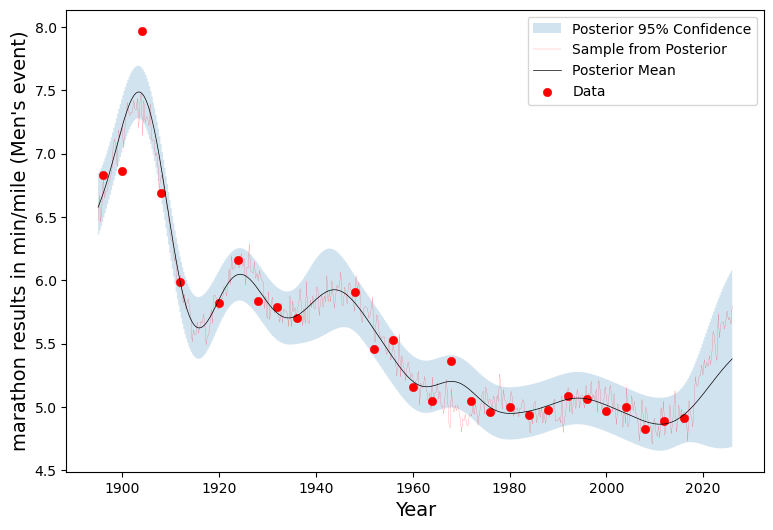

Processing event: 100M Men
7: Years extracted: [1896 1900 1904 1908 1912 1920 1924 1928 1932 1936 1948 1952 1956 1960
 1964 1968 1972 1976 1980 1984 1992 1996 2000 2004 2008 2012 2016]
8: Results extracted: [12.   11.   11.   10.8  10.8  10.8  10.6  10.8  10.3  10.3  10.3  10.4
 10.5  10.2  10.    9.9  10.14 10.06 10.25  9.99  9.96  9.84  9.87  9.85
  9.69  9.63  9.81]


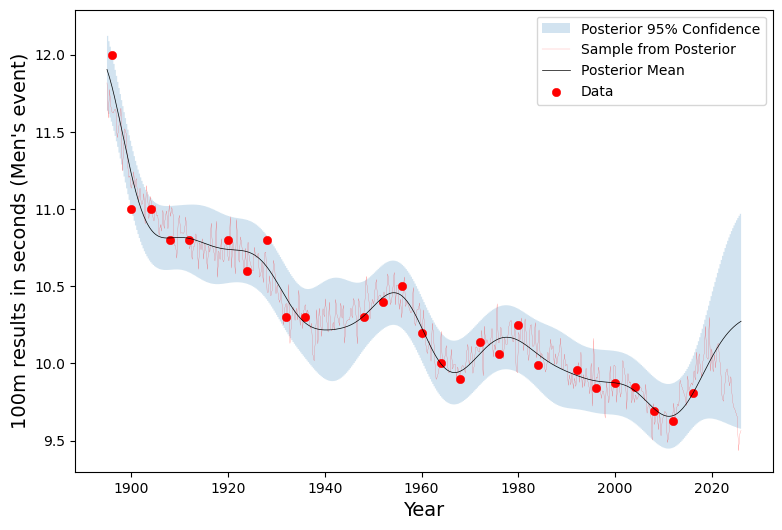

Processing event: 200M Men
7: Years extracted: [1900 1904 1908 1912 1920 1924 1928 1932 1936 1948 1952 1956 1960 1964
 1968 1972 1976 1980 1984 1992 1996 2000 2004 2008 2012 2016]
8: Results extracted: [22.2  21.6  22.6  21.7  22.   21.6  21.8  21.2  20.7  21.1  20.7  20.6
 20.5  20.3  19.8  20.   20.23 20.19 19.8  20.01 19.32 20.09 19.79 19.3
 19.32 19.78]


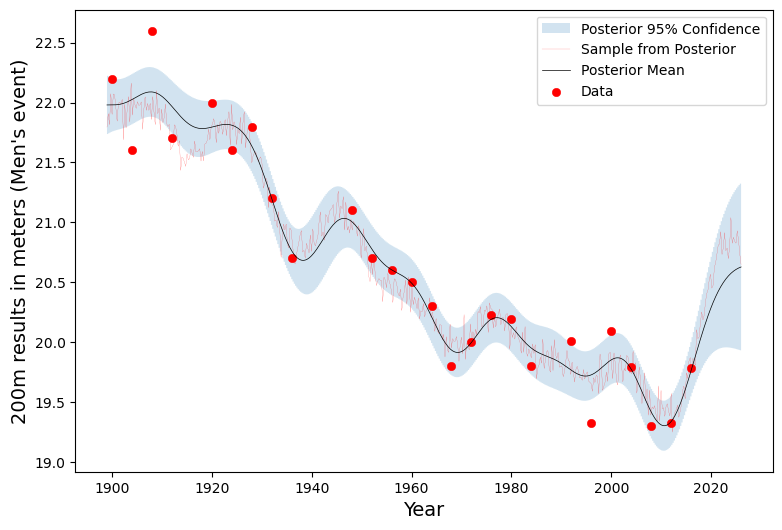

Processing event: Marathon Women
7: Years extracted: [1984 1988 1992 1996 2000 2004 2008 2012 2016]
8: Results extracted: [5.53 5.56 5.83 5.58 5.47 5.59 5.6  5.46 5.5 ]


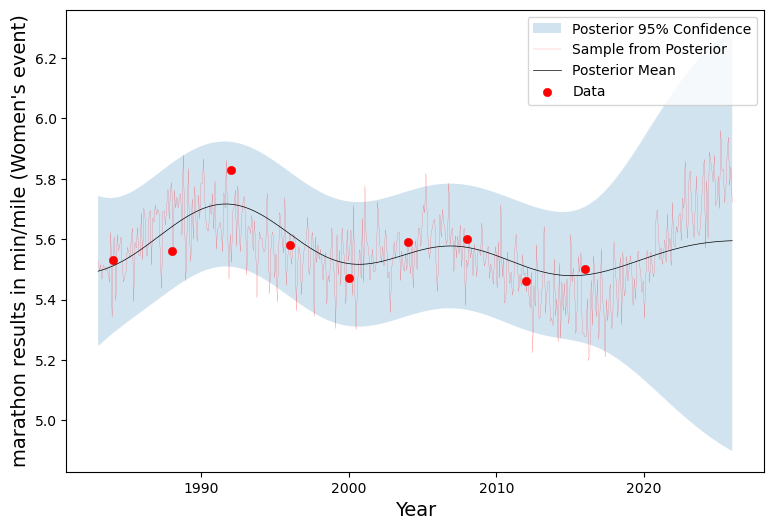

Processing event: 100M Women
7: Years extracted: [1928 1932 1936 1948 1952 1956 1960 1964 1968 1972 1976 1980 1984 1992
 1996 2004 2008 2012 2016]
8: Results extracted: [12.2  11.9  11.5  11.9  11.5  11.5  11.   11.4  11.   11.07 11.08 11.06
 10.97 10.82 10.94 10.93 10.78 10.75 10.71]


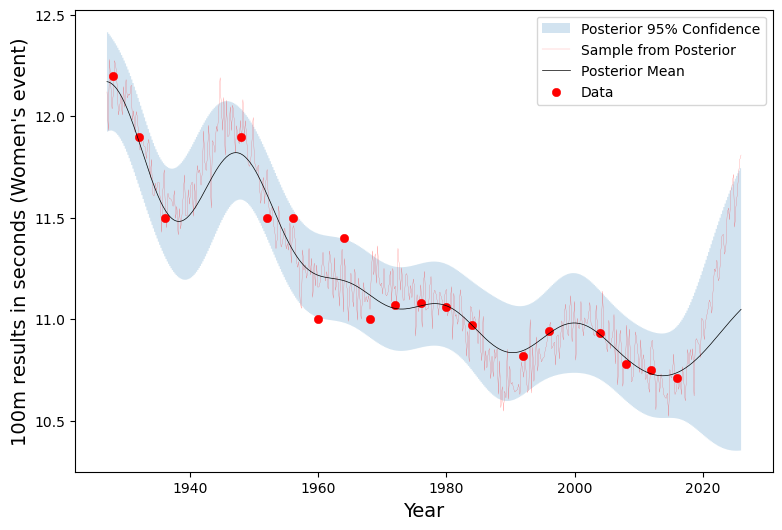

Processing event: 200M Women
7: Years extracted: [1948 1952 1956 1960 1964 1968 1972 1976 1980 1984 1992 1996 2000 2004
 2008 2012 2016]
8: Results extracted: [24.4  23.7  23.4  24.   23.   22.5  22.4  22.37 22.03 21.81 21.81 22.12
 22.27 22.05 21.74 21.88 21.78]


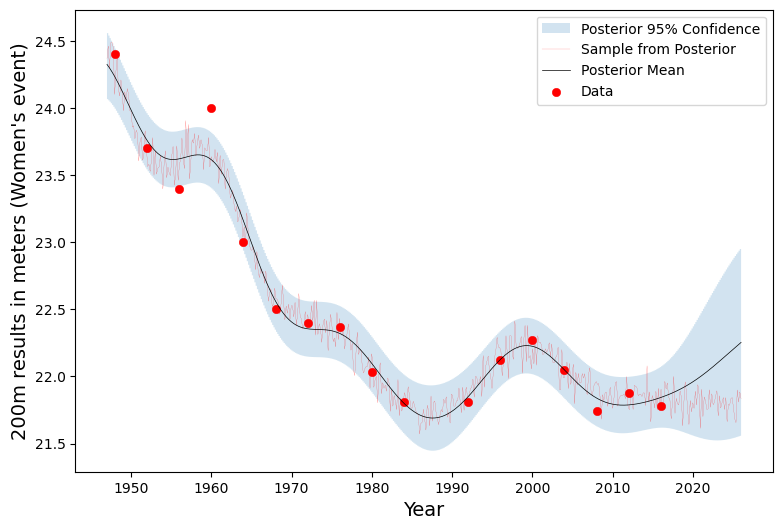

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def gaussian_sample(mu, Sigma):
    A = cholesky(Sigma)
    Z = np.random.normal(loc=0, scale=1, size=len(mu))
    return np.dot(A, Z) + mu

def mu_fun(x, mu=0):
    return mu * np.ones(len(x))

def K_fun(x, z, h=1):
    K = np.zeros(len(x)*len(z)).reshape(len(x), len(z))
    for j in np.arange(K.shape[1]):
        K[:,j] = (1/h)*np.exp(-(x-z[j])**2/(2*h**2))
    return K

# Define the function as specified
def gp_olympic_event(year, result, kernel=K_fun, mean=mu_fun, noise=5**2/60**2, event_name="Event"):

    year = np.array(year)
    result = np.array(result)

    h = 7

    K = kernel(year, year, h=h)
    Ks = kernel(year, np.linspace(year.min()-1, year.max()+10, 500), h=h)
    sigma2 = noise
    xs = np.linspace(year.min()-1, year.max()+10, 500)
    Kss = kernel(xs, xs, h=h) + sigma2 * np.eye(len(xs))
    Ki = np.linalg.inv(K + sigma2 * np.eye(len(year)))

    postMu = mu_fun(xs, mean) + Ks.T @ Ki @ (result - mu_fun(year, mean))
    postCov = Kss - Ks.T @ Ki @ Ks

    fig, ax = plt.subplots(1, 1, figsize=(9, 6))
    S2 = np.diag(postCov)
    ax.fill_between(
        xs,
        postMu - 2*np.sqrt(S2),
        postMu + 2*np.sqrt(S2),
        step="pre",
        alpha=0.2,
        label='Posterior 95% Confidence'
    )
    ys = gaussian_sample(postMu, postCov)
    ax.plot(xs, ys, c='r', linestyle='-', linewidth=0.1, label='Sample from Posterior')
    ax.plot(xs, postMu, c='black', linestyle='-', linewidth=0.5, label='Posterior Mean')
    ax.scatter(year, result, color='red', marker='o', linewidth=0.4, label='Data')
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel(event_name, fontsize=14)
    ax.legend()
    plt.show()
    plt.close()

# Lists of events
men_events = ['Marathon Men', '100M Men', '200M Men']
women_events = ['Marathon Women', '100M Women', '200M Women']
all_events = men_events + women_events


for one_event in all_events:    
    print(f"Processing event: {one_event}")
    event = dat[dat['Event'] == one_event]
    event = event[event['Medal'] == 'G']
    event = event.sort_values('Year')
    
    if 'Marathon' in one_event:
        mpm = []
        time = event['Result'].astype(str).values
        for tm in time:
            t = np.array(tm.split(':'), dtype=float)
            minutes_per_mile = (t[0]*60*60 + t[1]*60 + t[2]) / (60*26.2)
            mpm.append(minutes_per_mile)
    
        event['Minutes per Mile'] = np.round(mpm, 2)
        result = event['Minutes per Mile'].values
        
    else:
        result = event['Result'].astype(float).values
    
    event = event.drop(columns=['Gender', 'Event'], axis=1)
    event.reset_index(drop=True, inplace=True)
    
    year = event['Year'].values
    print(f'7: Years extracted: {year}')
    print(f'8: Results extracted: {result}')
    
    
    if 'Marathon' in one_event:
        unit = "min/mile"
    elif '100M' in one_event:
        unit = "seconds"
    elif '200M' in one_event:
        unit = "meters"
    
    gender = "Men's" if 'Men' in one_event else "Women's"
    event_name_formatted = f"{one_event.split()[0].lower()} results in {unit} ({gender} event)"
    

    gp_olympic_event(
        year=year,
        result=result,
        kernel=K_fun,
        mean=np.mean(result),
        noise=np.square(5/60),  # Ssandard error of 5 seconds
        event_name=event_name_formatted
    )

**<font color='darkorchid'>ANSWERS FOR ALL PLOTS</font>**

NOTE: I intentionally chose very similar events (all running events) to use similar kernel functions and noise.

**1. Marathon Men**

I used a Squared Exponential (RBF) kernel with a default length scale (h=7). The RBF kernel assumes that the function we're modeling is smooth, meaning that results (performance) should change gradually over time. I chose my  mean by taking the mean of all the values and using the mean function from the class demos. This provides a reasonable center for the predictions and helps the model anchor its predictions around a known baseline (the average result). This is especially helpful in long time-series data where the true mean might not be zero.
I arbitrarily chose a noise of 5 seconds and this seemed to look good with regards to the plot and the confidence interval. The plot looks satisfactory to me because the posterior mean follows the downward trend of the data, and the confidence interval captures the uncertainty in the predictions reasonably well.

The results start quite high (around 7 minutes per mile in the late 1800s), and there's a noticeable downward trend over time, indicating improvements in marathon running efficiency. The 1904 marathon result is significantly higher than the surrounding results. This anomaly might be due to the extreme conditions of the 1904 St. Louis Olympic marathon, where the race was run in extreme heat, and many runners collapsed. It's a notable outlier in the data.

**2. 100M Men** 

Again, I used the RBF kernel because it is a running event with likely gradual improvements.I chose my prior mean by taking the mean of all the values and using the mean function from the class demos to calculate posterior. Here, a noise of 5 seconds also fit the data nicely to the eye. The plot is satisfactory. The model captures the downward trend and provides a smooth posterior mean. The confidence intervals remain tight, indicating less uncertainty in the predictions. No specific outliers like the 1904 marathon, but the steady improvement over time is notable, with significant drops in the later 20th century due to improved training and technology.

**3. 200M Men**

Here I also used RBF because it is a running event. I chose my prior mean by taking the mean of all the values and using the mean function from the class demos to calculate posterior. 5 second noise also looked good here. The plot looks satisfactory, but with slight deviations in certain years where times stagnate. Overall, the model fits the data well, and the confidence intervals reflect some uncertainty but remain tight. Similar to the 100m event, the times improve steadily, with the model capturing this trend well.

**4. Marathon Women**

Here I also used RBF because it is a running event. I chose my prior mean by taking the mean of all the values and using the mean function from the class demos to calculate posterior. 5 second noise also looked good here. The women's marathon data starts in 1984, so it's a shorter time-series. The results show a steady decline in time (indicating faster performances). The plot is *somewhat satisfactory*. The posterior mean captures the general trend, but due to the shorter time series and fewer data points, there is more uncertainty (wider confidence intervals).

**5. 100M Women**

Here I also used RBF because it is a running event. I chose my prior mean by taking the mean of all the values and using the mean function from the class demos to calculate posterior. 5 second noise also looked good here. The times improve significantly, with notable improvements starting from around the 1950s onward. The plot is satisfactory, as the GP captures the smooth improvement. However, it struggles to capture some of the small jumps in performance improvement, which might indicate that another kernel (like the Rational Quadratic kernel) might perform better.


**6. 200M Women**

Here I also used RBF because it is a running event. I chose my prior mean by taking the mean of all the values and using the mean function from the class demos to calculate posterior. 5 second noise also looked good here. The results show a steady improvement over time, but the results fluctuate more than in the 100m event. The plot is mostly satisfactory, though the fluctuations in the later years show that the model's smooth assumption doesn't always hold true for this event.

**What happens to the posterior mean (for example during WWII) if there are gaps in the data?**

The posterior mean will interpolate the results across the missing years based on the trend it has learned from the previous and later data points. If the trend is smooth before and after the gap (as is the case in most of these events), the GP will produce a smooth interpolation across the gap.
Ex: In the Marathon Men event, the results around WWII (1940s) are consistent before and after the gap, so the GP produces a reasonable posterior mean across those missing years.

## Problem 3: Double descent! (20 points)

<a href="https://skitheworld.com/2018/12/wurtele-twins-appointed-order-canada/"><img src="https://raw.githubusercontent.com/YData123/sds365-fa22/main/assignments/assn1/double.jpg" width="200" align="left" style="margin:10px 30px 10px 0px"></a>


In this problem you will explore the "double descent" phenomenon that was recently 
discovered as a key principle underlying the performance of deep neural networks.
The problem setup is a "random features" version of a 2-layer neural network. The weights in the first layer are random and fixed, and the weights in the second layer are estimated from data. As we increase the number of neurons in the hidden layer, the dimension $p$ of model increases. It's helpful to define the ratio $\gamma = p/n$ of variables to sample points. If $\gamma < 1$ then we want to use the OLS estimator, and if $\gamma > 1$ we want to use the minimum norm estimator. 
<br>

Your mission (should you choose to accept it), is

1. Implement a function `OLS_or_minimum_norm` that computes the least squares solution when $\gamma < 1$, and the minimum norm solution when $\gamma > 1$. (When $\gamma=1$ the estimator does not, in general, exist.)
1. Run the main code we give you to average over many trials, and to compute and plot the estimated risk for a range of values of $\gamma$. 
1. Next, extend the starter code so that you compute (estimates of) the squared-bias and variance of the models. To do this, note that you'll need access to the true regression function, which is provided. You may want to refer to the demo code for smoothing kernels as an example.
1. Using your new code, extend the plotting function we provide so that you plot 
the squared-bias, variance, and risk together on the same plot. 
1. Finally, comment on the results, describing why it might make sense that the squared bias, variance, and risk have the given shapes that they do.
1. Show that in the overparameterized regime $\gamma > 1$, as $\lambda \to 0$, the ridge regression estimator converges to the minimum norm estimator.


By doing this exercise you will solidify your understanding of the meaning of bias and variance, and also gain a better understanding of the "double descent" phenomenon for overparameterized neural networks, 
and their striking resistance to overfitting.

We're available in OH to help with any issues you run into!

If you have any interest in background reading on this topic (not expected or required), we recommend Hastie et al., ["Surprises in high-dimensional ridgeless least squares regression"](https://www.stat.cmu.edu/~ryantibs/papers/ridgeless.pdf).



In [41]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

### Problem 3.1

Implement the function `OLS_or_minimum_norm` that computes the OLS solution for $\gamma < 1$, and the minimum norm solution for $\gamma > 1$.

In [43]:
def OLS_or_minimum_norm(X, y):
    ## Your code here
    n, p = X.shape
    gamma = p / n
    
    if gamma < 1:
        # OLS Solution: (X^T X)^-1 X^T y
        try:
            XtX = X.T @ X
            XtX_inv = np.linalg.inv(XtX)
            beta = XtX_inv @ X.T @ y
        except np.linalg.LinAlgError:
            # In case X^T X is singular, use pseudo-inverse
            beta = np.linalg.pinv(X) @ y
    elif gamma > 1:
        # Minimum Norm Solution: X^T (X X^T)^-1 y
        try:
            X_Xt = X @ X.T
            X_Xt_inv = np.linalg.inv(X_Xt)
            beta = X.T @ X_Xt_inv @ y
        except np.linalg.LinAlgError:
            # In case X X^T is singular, use pseudo-inverse
            beta = np.linalg.pinv(X) @ y
    else:
        raise ValueError("Estimator does not exist for gamma = 1.")
    
    return beta

In [44]:
# A plotting function we provide. No need to change this, although you can if you'd like.

def plot_double_descent_risk(gammas, risk, sigma):
    gammas = np.round(gammas, 2)
    fig, ax = plt.subplots(figsize=(10,6))
    tick_pos = np.zeros(len(gammas))
    for i in np.arange(len(gammas)):
        if gammas[i] <= 1:
            tick_pos[i] = gammas[i] * 10
        else:
            tick_pos[i] = gammas[i] + 9
    ax.axvline(x=tick_pos[np.array(gammas)==1][0], linestyle='dashed', color='gray')
    ax.axhline(y=sigma**2, linestyle='dashed', color='gray')
    ax.scatter(tick_pos, risk, color='salmon')
    ax.plot(tick_pos, risk, color='gray', linewidth=.5)

    tickgam = [gam for gam in gammas if (gam > .05 and gam <= .9) or gam >= 2 or gam == 1]
    ticks = [tick_pos[j] for j in np.arange(len(tick_pos)) if gammas[j] in tickgam]
    ax.xaxis.set_ticks(ticks)
    ax.xaxis.set_ticklabels(tickgam)

    plt.xlabel(r'$\gamma = \frac{p}{n}$', fontsize=18)
    _ = plt.ylabel('Risk', fontsize=18)

### Data setup 

The following cell sets up our data. The inputs $X$ are 
random Gaussian vectors of dimension $d=10$. Then, we map these 
using a neural network with fixed, Gaussian weights, to get random features
corresponding to $p^* = 150$ hidden neurons. The second layer 
coefficients are $\beta^* \in {\mathbb R}^{p^*}$, which are fixed. 
This defines the true model.


In [45]:
# just execute this cell, after you define the function above.

np.random.seed(123456)

sigma = 1
d = 10
p_star = 150
signal_size = 5

W_star = (1/np.sqrt(d)) * np.random.randn(d, p_star)
beta_star = np.arange(p_star)
beta_star = signal_size * beta_star / np.sqrt(np.sum(beta_star**2))

N = 10000
X = np.random.randn(N, d)

# f_star is the true regression function, for computing the squared bias
f_star = np.dot(np.tanh(np.dot(X, W_star)), beta_star)
noise = sigma * np.random.randn(N)
y = f_star + noise
yf = np.concatenate((y.reshape(N,1), f_star.reshape(N,1)), axis=1)

### Train a sequence of models for different values of $\gamma$

Next, we train a sequence of models for different values of $\gamma$, always 
fixing the sample size at $n=200$, but varying the dimension $p = \gamma n$. 
When $p < p^*$ we just take the first $p$ features in the true model. 
When $p > p^*$ we add $p-p^*$ neurons to the hidden layer, with their 
own random weights.

In the code below, we loop over the different values of $\gamma$, 
and for each $\gamma$ we run $100$ trials, each time generating 
a new training set of size $n=200$. The model (either OLS or minimum norm) is then computed, the MSE is computed, and finally the risk is estimated by averaging over all $100$ trials.


In [46]:
trials = 100
n = 200

gammas = list(np.arange(.1, 1, .1)) + [.92, .94, 1, 1.1, 1.2, 1.4, 1.6] + list(np.arange(2, 11, 1))
gammas = [.01, .05] + gammas
risk = []
for gamma in gammas:
    err = []
    p = int(n * gamma)
    if gamma == 1:
        risk.append(np.inf)
        continue
    W = (1/np.sqrt(d)) * np.random.randn(d, p)
    W[:,:min(p, p_star)] = W_star[:,:min(p, p_star)]
    for i in np.arange(trials):
        X_train, X_test, yf_train, yf_test = train_test_split(X, yf, train_size=n, test_size=1000)
        H_train = np.tanh(np.dot(X_train, W))
        H_test = np.tanh(np.dot(X_test, W))
        beta_hat = OLS_or_minimum_norm(H_train, yf_train[:,0])
        yhat_test = H_test @ beta_hat 
        err.append(np.mean((yhat_test - yf_test[:,0])**2))
    print('gamma=%.2f  p=%d  n=%d  risk=%.3f' % (gamma, p, n, np.mean(err)))
    risk.append(np.mean(err))


gamma=0.01  p=2  n=200  risk=7.373
gamma=0.05  p=10  n=200  risk=4.146
gamma=0.10  p=20  n=200  risk=2.294
gamma=0.20  p=40  n=200  risk=2.099
gamma=0.30  p=60  n=200  risk=2.267
gamma=0.40  p=80  n=200  risk=2.534
gamma=0.50  p=100  n=200  risk=3.011
gamma=0.60  p=120  n=200  risk=3.573
gamma=0.70  p=140  n=200  risk=4.443
gamma=0.80  p=160  n=200  risk=6.885
gamma=0.90  p=180  n=200  risk=15.773
gamma=0.92  p=184  n=200  risk=20.500
gamma=0.94  p=188  n=200  risk=31.661
gamma=1.10  p=220  n=200  risk=24.179
gamma=1.20  p=240  n=200  risk=14.097
gamma=1.40  p=280  n=200  risk=8.089
gamma=1.60  p=320  n=200  risk=6.543
gamma=2.00  p=400  n=200  risk=5.301
gamma=3.00  p=600  n=200  risk=4.073
gamma=4.00  p=800  n=200  risk=3.658
gamma=5.00  p=1000  n=200  risk=3.430
gamma=6.00  p=1200  n=200  risk=3.309
gamma=7.00  p=1400  n=200  risk=3.135
gamma=8.00  p=1600  n=200  risk=3.190
gamma=9.00  p=1800  n=200  risk=3.056
gamma=10.00  p=2000  n=200  risk=3.062


### Plot the risk

At this point, you can plot the risk by just evaluating the cell below. 
This should reveal the "double descent" behavior.


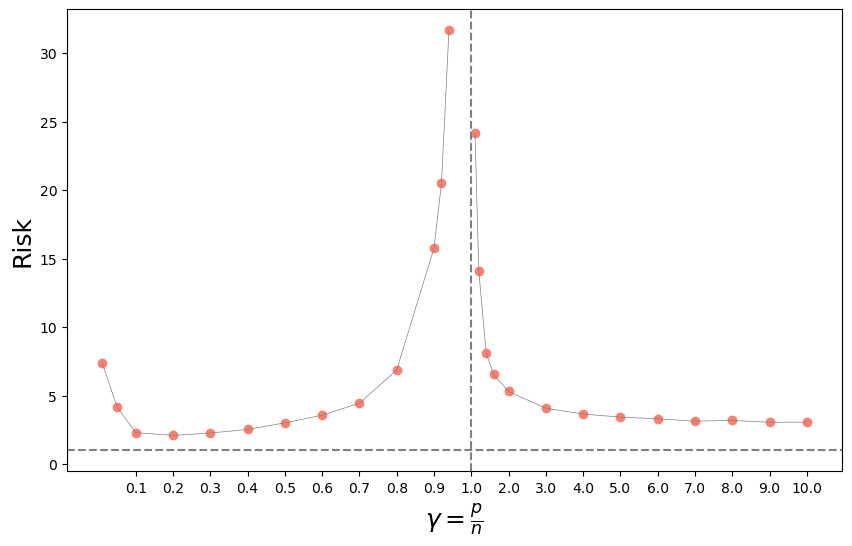

In [47]:
# Just evaluate the next line 
plot_double_descent_risk(gammas, risk, sigma)

### Problem 3.2

Comment on the results. Explain why the risk plot does or does not make sense 
in each regime: The underparameterized regime $\gamma < 1$, and the overparameterized 
regime $\gamma > 1$. Is the curve "U-shaped" in the underparameterized regime? Why or why not?
What about in the overparameterized regime? You will be able to give better answers to these questions when you estimate the bias and variance below.


<font color='darkorchid'>Answer:</font>

In the underparameterized regime, increasing the number of parameters allows the model to better fit the data, reducing bias. However, as the number of parameters approaches the number of data points, variance may increase slightly because the model starts to overfit the training data. The curve is U-shaped because the risk decreases initially as the model becomes better at capturing the data patterns, but as γ approaches 1, the risk starts to rise due to the model's increasing complexity and its sensitivity to noise. Here, OLS is used.

In the overparameterized regime, the model can continue fitting the training data well while also generalizing better to unseen data, leading to a reduction in risk as more parameters are added. This counters the traditional bias-variance tradeoff, where one might expect increasing variance and overfitting as model complexity increases. Here, minimum norm is used. 

### Problem 3.3

Now, modify the above code so that you can estimate both the squared bias and the 
variance of the estimator. Before you do this, you may want to revisit the kernel smoothing demo from class, where we computed the squared bias, variance, and risk. You'll need the true function, which is provided in the variable `yf`.  You should not have to write a lot of code, but can compute the bias and variance after you store the predicted values on the test data for each trial.

Plot the results, by plotting both the squared bias, the variance, and the risk for the sequence of gammas. To do this you will have to modify the plotting function appropriately, but this again involves minimal changes. When you obtain your final plot, comment 
on the shape of the bias and variance curves, as above for Problem 3.2.


In [48]:
def compute_bias_variance_risk(predictions, true_values):
    mean_predictions = np.mean(predictions, axis=0)
    squared_bias = np.mean((mean_predictions - true_values) ** 2)
    variance = np.mean(np.var(predictions, axis=0))
    risk = squared_bias + variance
    return squared_bias, variance, risk

In [62]:
trials = 100
n = 200

gammas = list(np.arange(.1, 1, .1)) + [.92, .94, 1, 1.1, 1.2, 1.4, 1.6] + list(np.arange(2, 11, 1))
gammas = [.01, .05] + gammas
risk = []
squared_bias = []
variance = []

_, X_test, _, yf_test = train_test_split(X, yf, train_size=1, test_size=1000)


for gamma in gammas:
    err = []
    outputs = []
    p = int(n * gamma)
    
    if gamma == 1:
        risk.append(np.inf)
        squared_bias.append(np.inf)
        variance.append(np.inf)
        continue
        
        
    W = (1/np.sqrt(d)) * np.random.randn(d, p)
    W[:,:min(p, p_star)] = W_star[:,:min(p, p_star)]
    
    
    for i in np.arange(trials):
        X_train, _, yf_train, _ = train_test_split(X, yf, train_size=n, test_size=n)
        H_train = np.tanh(np.dot(X_train, W))
        H_test = np.tanh(np.dot(X_test, W))
        beta_hat = OLS_or_minimum_norm(H_train, yf_train[:,0])
        yhat_test = H_test @ beta_hat 
        err.append(np.mean((yhat_test - yf_test[:,0])**2))
        outputs.append(yhat_test)
        
        
    print('gamma=%.2f  p=%d  n=%d  risk=%.3f' % (gamma, p, n, np.mean(err)))
    risk.append(np.mean(err))
    
    averages = np.mean(outputs, axis=0)
    one_squared_bias = np.mean((averages - yf_test[:, 1]) ** 2)
    squared_bias.append(one_squared_bias)
    
    one_variance = np.mean(np.var(outputs, axis=0))
    variance.append(one_variance)

gamma=0.01  p=2  n=200  risk=7.409
gamma=0.05  p=10  n=200  risk=3.988
gamma=0.10  p=20  n=200  risk=2.265
gamma=0.20  p=40  n=200  risk=2.103
gamma=0.30  p=60  n=200  risk=2.280
gamma=0.40  p=80  n=200  risk=2.537
gamma=0.50  p=100  n=200  risk=2.985
gamma=0.60  p=120  n=200  risk=3.538
gamma=0.70  p=140  n=200  risk=4.382
gamma=0.80  p=160  n=200  risk=6.900
gamma=0.90  p=180  n=200  risk=15.503
gamma=0.92  p=184  n=200  risk=19.839
gamma=0.94  p=188  n=200  risk=29.296
gamma=1.10  p=220  n=200  risk=23.345
gamma=1.20  p=240  n=200  risk=12.939
gamma=1.40  p=280  n=200  risk=8.341
gamma=1.60  p=320  n=200  risk=6.277
gamma=2.00  p=400  n=200  risk=4.957
gamma=3.00  p=600  n=200  risk=4.057
gamma=4.00  p=800  n=200  risk=3.549
gamma=5.00  p=1000  n=200  risk=3.370
gamma=6.00  p=1200  n=200  risk=3.135
gamma=7.00  p=1400  n=200  risk=3.104
gamma=8.00  p=1600  n=200  risk=3.061
gamma=9.00  p=1800  n=200  risk=3.015
gamma=10.00  p=2000  n=200  risk=3.067


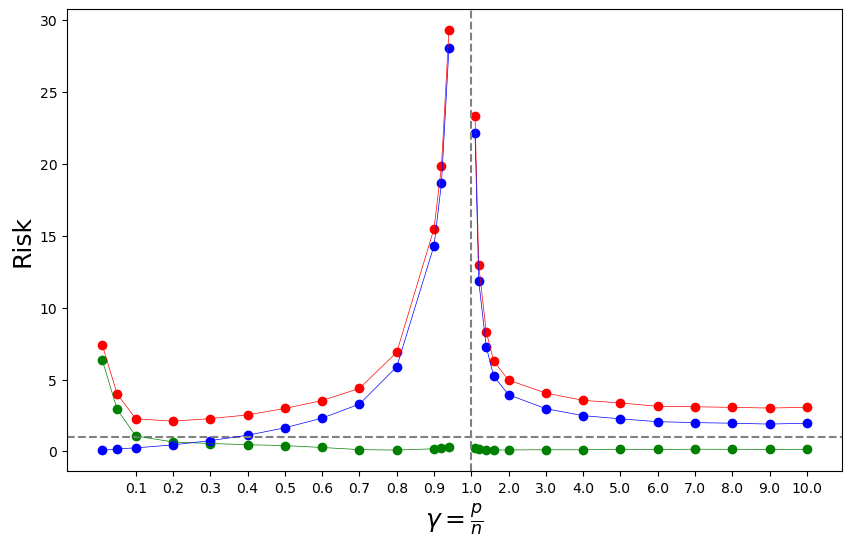

In [63]:
def plot_new_double_descent_risk(gammas, risk, sigma):
    gammas = np.round(gammas, 2)
    fig, ax = plt.subplots(figsize=(10,6))
    tick_pos = np.zeros(len(gammas))
    for i in np.arange(len(gammas)):
        if gammas[i] <= 1:
            tick_pos[i] = gammas[i] * 10
        else:
            tick_pos[i] = gammas[i] + 9
    ax.axvline(x=tick_pos[np.array(gammas)==1][0], linestyle='dashed', color='gray')
    ax.axhline(y=sigma**2, linestyle='dashed', color='gray')
    ax.scatter(tick_pos, risk, color='red')
    ax.plot(tick_pos, risk, color='red', linewidth=.5)
    ax.scatter(tick_pos, squared_bias, color='green', label='Squared Bias')
    ax.plot(tick_pos, squared_bias, color='green', linewidth=.5)
    ax.scatter(tick_pos, variance, color='blue', label='Variance')
    ax.plot(tick_pos, variance, color='blue', linewidth=.5)
    

    tickgam = [gam for gam in gammas if (gam > .05 and gam <= .9) or gam >= 2 or gam == 1]
    ticks = [tick_pos[j] for j in np.arange(len(tick_pos)) if gammas[j] in tickgam]
    ax.xaxis.set_ticks(ticks)
    ax.xaxis.set_ticklabels(tickgam)

    plt.xlabel(r'$\gamma = \frac{p}{n}$', fontsize=18)
    _ = plt.ylabel('Risk', fontsize=18)
    plt.legend
    plt.show()
    
plot_new_double_descent_risk(gammas, risk, sigma)

### Problem 3.4

In class, we discussed the interpretation of the minimum-norm estimator $ \hat{\beta}_{\text{mn}} $. Geometrically, we can describe $ \hat{\beta}_{\text{mn}} $ as the orthogonal projection of the zero vector in $ \mathbb{R}^p $ onto the $ (p-1) $-dimensional hyperplane $ \{ \beta : X\beta = Y \} $.  

This can also be viewed as "ridgeless" regression. In ridge regression, we minimize the objective function
$$
\| Y - X\beta  \|_2^2 + \lambda \| \beta \|_2^2,
$$
which has the closed-form solution
$$
\hat{\beta}_{\lambda} = (X^T X + \lambda I)^{-1} X^T Y.
$$

In the overparameterized regime where $ p > n $, it can be shown that as $ \lambda \to 0 $, $ \hat{\beta}_{\lambda} $ converges to $ \hat{\beta}_{\text{mn}} $. 

Your task is to show that as $ \lambda \to 0 $, the limit of the ridge regression estimator $ \hat{\beta}_{\lambda} $, in the overparameterized regime where $ \gamma > 1 $, is the minimum-norm estimator $ \hat{\beta}_{\text{mn}} $. You may want to use the Woodbury formula for this derivation.


_Hint_:
1. Applying the simplified version of Woodbury formula
$$
(I + UV^T)^{-1} = I - U(I + V^T U)^{-1} V^T.
$$ 
we can derive the identity:
$$
(X^T X + \lambda I_p)^{-1} X^T = X^T (X X^T + \lambda I_n)^{-1},
$$
2. You might consider using the Woodbury formula twice.



[Your markdown here]

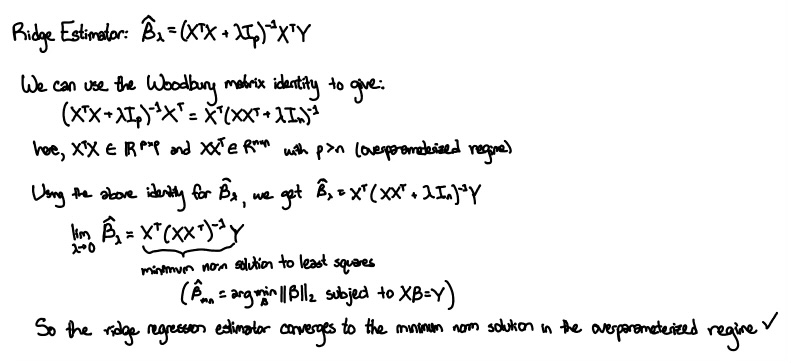